<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
sort_by_duration = movies.sort_values('duration',ascending=False)
print('longest movie = ', sort_by_duration['title'].head(1))
print('shortest movie = ', sort_by_duration['title'].tail(1))

longest movie =  476    Hamlet
Name: title, dtype: object
shortest movie =  389    Freaks
Name: title, dtype: object


#### Create a histogram of duration, choosing an "appropriate" number of bins.

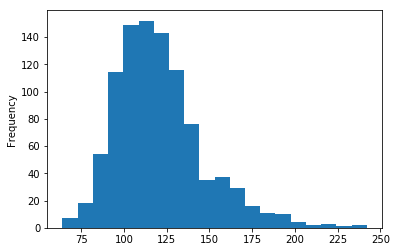

In [7]:
# Answer:
movies['duration'].plot(kind = 'hist', bins = 20)

#### Use a box plot to display that same data.

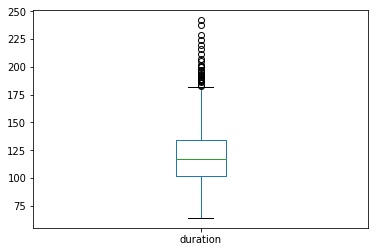

In [8]:
# Answer:
movies['duration'].plot(kind = 'box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Movie Count')

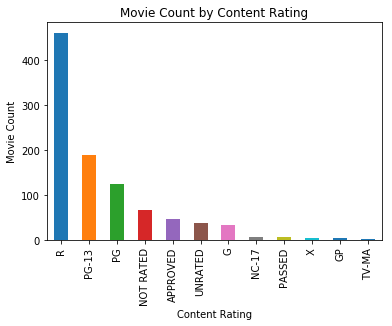

In [10]:
# Answer:
movies['content_rating'].value_counts().plot(kind='bar')
plt.title('Movie Count by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Movie Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
movies['content_rating'].replace(["NOT RATED","APPROVED","PASSED","GP"], "UNRATED", inplace=True )
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies['content_rating'].replace(["X","TV-MA"], "NC-17", inplace=True )
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [34]:
# Answer:
movies[movies['content_rating'].isnull()]
movies['content_rating'].fillna(value = "reasonable", inplace = True)
movies[movies['content_rating']=='reasonable']


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,reasonable,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,reasonable,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,reasonable,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [30]:
# Answer:
longer = movies[movies['duration']>=120].star_rating.mean()
shorter = movies[movies['duration']<120].star_rating.mean()
print('The average star rating for movies 2 hours or longer = ', round(longer, 2))
print('The average star rating for movies shorter than 2 hours = ', round(shorter, 2))

The average star rating for movies 2 hours or longer =  7.95
The average star rating for movies shorter than 2 hours =  7.84


#### Use a visualization to detect whether there is a relationship between duration and star rating.

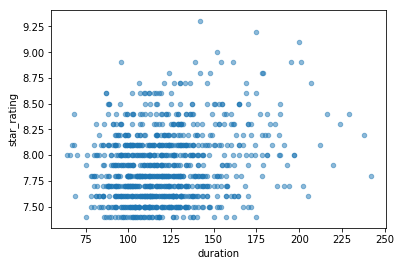

In [39]:
# Answer:
movies.plot(kind='scatter', x = 'duration', y = 'star_rating', alpha = 0.5)

#### Calculate the average duration for each genre.

In [40]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

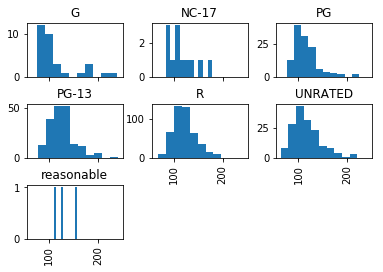

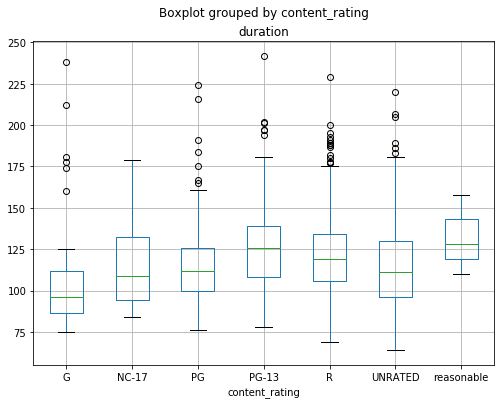

In [58]:
# Answer:
movies.duration.hist(by=movies['content_rating'], sharex=True)
movies.boxplot(column='duration', by='content_rating',figsize = (8,6))

#### Determine the top rated movie (by star rating) for each genre.

In [99]:
# Answer:
ax = movies.sort_values('star_rating',ascending = False)
ax.groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [97]:
# Answer:
dup_title = movies[movies['title'].duplicated()].title
movies[movies['title'].isin(dup_title)].sort_values('title').title

703                            Dracula
905                            Dracula
678                     Les Miserables
924                     Les Miserables
466    The Girl with the Dragon Tattoo
482    The Girl with the Dragon Tattoo
662                          True Grit
936                          True Grit
Name: title, dtype: object

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [120]:
# Answer:
avg = movies.groupby('genre').star_rating.mean()
avg[movies['genre'].value_counts() >= 12]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [122]:
# Answer:
rating_by_genre = movies.groupby('genre').star_rating.agg(['count','mean'])
rating_by_genre[rating_by_genre['count'] >= 12]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!